In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv('./data/yields.txt', delimiter = ' ')
df.head()

,1mon,2mon,3mon,4mon,5mon,5.5mon,6.5mon,7.5mon,8.5mon,9.5mon,NA
0,5.59957,7.22989,7.60820,7.72886,7.75856,7.74944,7.73191,7.71845,7.75699,7.79656,7.80871
1,5.63497,7.17471,7.51762,7.65834,7.69625,7.68582,7.67083,7.66179,7.69745,7.74334,7.75632
2,5.61633,7.20652,7.55039,7.71713,7.75815,7.74095,7.72610,7.71934,7.75459,7.79603,7.80092
3,5.71211,7.20071,7.54165,7.71308,7.76433,7.74835,7.73323,7.72261,7.74459,7.78738,7.79996
4,5.78938,7.19130,7.56918,7.73931,7.78977,7.77982,7.76339,7.73900,7.77044,7.80845,7.81773


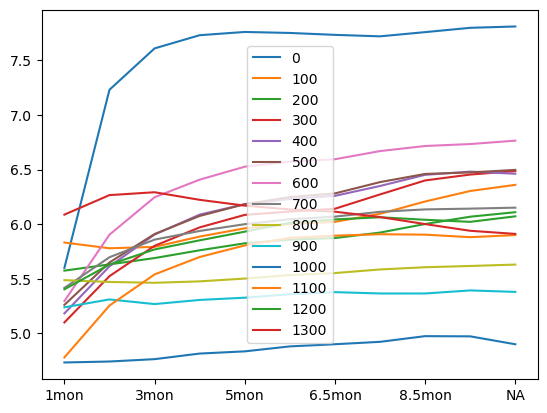

In [99]:
n = len(df)
for i in range(0, n, 100):
    df.iloc[i, :].plot(label = f'{i}')
plt.legend()

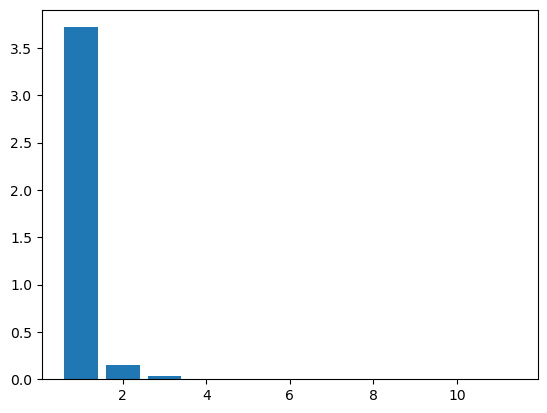

In [100]:
eig = np.linalg.eig(df.cov())
eig_val = eig[0]
eig_vec = eig[1]
x_val = range(1, len(eig_val)+1)
plt.bar(x_val, eig_val)
plt.show()

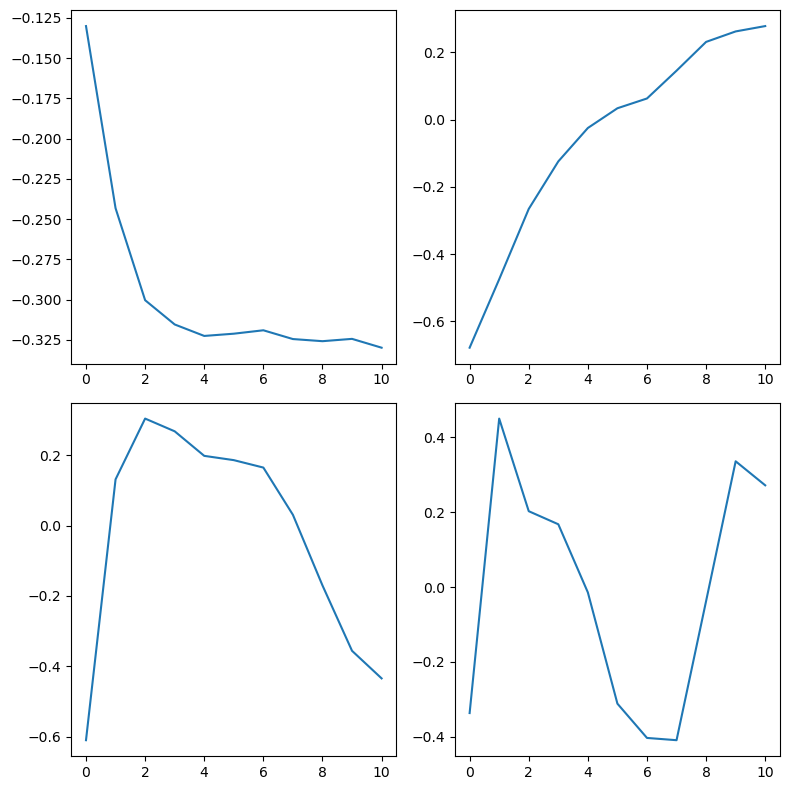

In [101]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8))

axes[0, 0].plot(eig_vec[:, 0])
axes[0, 1].plot(eig_vec[:, 1])
axes[1, 0].plot(eig_vec[:, 2])
axes[1, 1].plot(eig_vec[:, 3])

plt.tight_layout()
plt.show()

In [102]:
from statsmodels.tsa.stattools import adfuller

In [103]:
adfuller(df.iloc[:, 0])

(-1.3478283284900594,
 0.6070168905483413,
 10,
 1341,
 {'1%': -3.435235802905193,
  '5%': -2.8636977029164603,
  '10%': -2.5679187656267293},
 -4163.732443839597)

The t-statistics is larger than 10% significant level, we can reject the null hypothesis, so the data is not stationary.

In [114]:
delta_yield = df.diff().dropna()

In [118]:
adfuller(delta_yield.iloc[:, 0])

(-11.794307707085578,
 9.660383412777909e-22,
 9,
 1341,
 {'1%': -3.435235802905193,
  '5%': -2.8636977029164603,
  '10%': -2.5679187656267293},
 -4159.639017264344)

This reject the 1% significant level, which indicates it is stationary.

In [119]:
from sklearn.decomposition import PCA

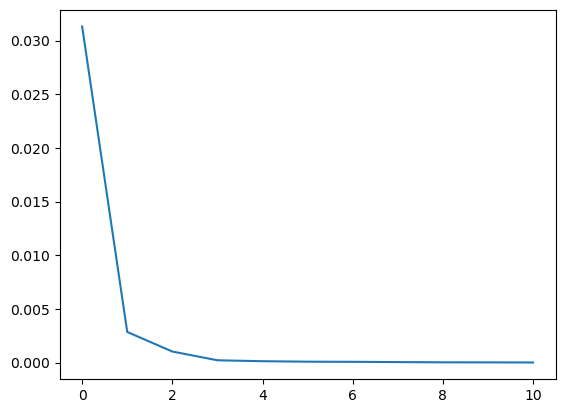

In [127]:
pca = PCA()
pca.fit(delta_yield)
plt.plot(pca.explained_variance_)